In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
df = pd.read_csv('loan.csv')
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [20]:
df.isnull().sum()

age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [22]:
df_encoded = pd.get_dummies(df,drop_first=True)
df_encoded.head()

,age,income,credit_score,gender_Male,occupation_Analyst,occupation_Architect,occupation_Artist,occupation_Banker,occupation_Chef,occupation_Consultant,...,occupation_Stylist,occupation_Teacher,occupation_Veterinarian,occupation_Writer,education_level_Bachelor's,education_level_Doctoral,education_level_High School,education_level_Master's,marital_status_Single,loan_status_Denied
0,32,85000,720,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,45,62000,680,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
2,28,25000,590,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
3,51,105000,780,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,36,75000,710,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [23]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   age                          61 non-null     int64
 1   income                       61 non-null     int64
 2   credit_score                 61 non-null     int64
 3   gender_Male                  61 non-null     bool 
 4   occupation_Analyst           61 non-null     bool 
 5   occupation_Architect         61 non-null     bool 
 6   occupation_Artist            61 non-null     bool 
 7   occupation_Banker            61 non-null     bool 
 8   occupation_Chef              61 non-null     bool 
 9   occupation_Consultant        61 non-null     bool 
 10  occupation_Dentist           61 non-null     bool 
 11  occupation_Designer          61 non-null     bool 
 12  occupation_Doctor            61 non-null     bool 
 13  occupation_Editor            61 non-null     bool 
 

In [24]:
x = df_encoded.drop('loan_status_Denied',axis=1)
y = df_encoded['loan_status_Denied']

In [25]:
# Training and testing data
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
# Logistic Regression model
model = LogisticRegression()

In [27]:
# Training the model
model.fit(x_train, y_train)

LogisticRegression()

In [28]:
# Predicting on test data
y_pred = model.predict(x_test)

In [29]:
# Accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


In [30]:

confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[9 0]
 [0 4]]


In [31]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00         9
        True       1.00      1.00      1.00         4

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [34]:
import numpy as np
df1 = pd.DataFrame(np.zeros((1,x_train.shape[1])), columns=x_train.columns)

# Predicting on a new data point
df1.at[0,'age'] = 35
df1.at[0,'income']=80000
df1.at[0,'credit_score']=650
df1.at[0,'gender_Male']=1
df1.at[0,'occupation_Engineer']=1
df1.at[0,'education_level_Bachelor\'s']=1
df1.at[0,'marital_status_Single']=1

new_pred = model.predict(df1)
#print(new_pred)

if new_pred[0] == True:
    result = "Denied"
else:
    result = "Approved"

print(result)

Approved


In [35]:
from sklearn.model_selection import cross_val_score
# Performing cross-validation score
cv_score = cross_val_score(model,x,y,cv=5)
print(cv_score)

# Average cross-validation score
print("Average cross-validation score: ", cv_score.mean())

[1.         0.91666667 0.91666667 1.         1.        ]
Average cross-validation score:  0.9666666666666666


In [36]:
df_encoded['loan_status_Denied'].value_counts()

loan_status_Denied
False    45
True     16
Name: count, dtype: int64

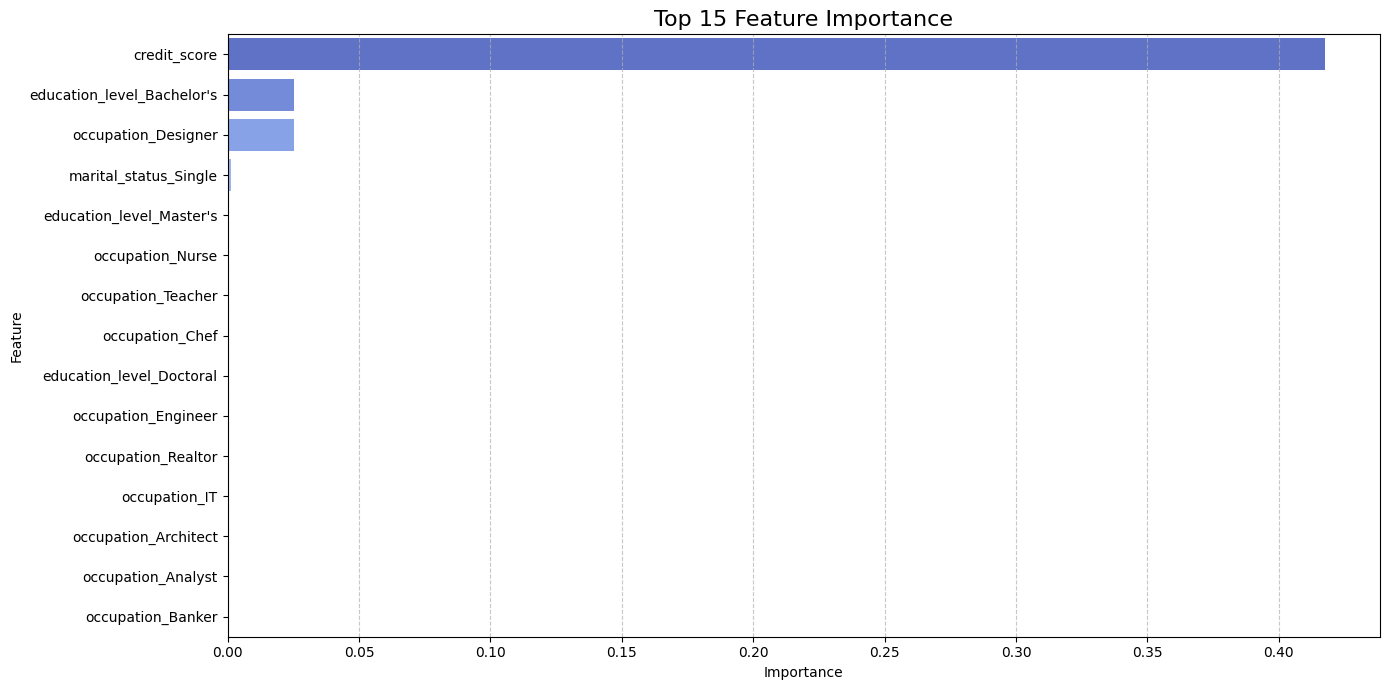

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the feature importance and select top 10 for clarity
top_n = 15
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False).head(top_n)

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='coolwarm')

# Adjust title and add gridlines
plt.title(f'Top {top_n} Feature Importance', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()
